In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Desktop\Bangalore House Price\Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [5]:
df_1 = df.drop(['area_type', 'availability', 'society'], axis=1)
df_1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
print('Percnetage of missing values: ')
round((df_1.isnull().sum()/len(df_1))*100, 2)

Percnetage of missing values: 


location      0.01
size          0.12
total_sqft    0.00
bath          0.55
balcony       4.57
price         0.00
dtype: float64

In [7]:
#Since the percentage of the missing values is comparitively less we can drop them.

df_2 = df_1.dropna()
df_2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [8]:
df_2.shape

(12710, 6)

In [9]:
df_2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [10]:
df_2['bhk'] = df_2['size'].apply(lambda x: int(x.split(' ')[0]))
df_2.drop('size', axis=1, inplace=True)
df_2.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [11]:
df_2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df_2[~df_2.total_sqft.apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,1160 - 1195,2.0,0.0,59.935,2


In [14]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
df_3 = df_2.copy()
df_3['total_sqft'] = df_3['total_sqft'].apply(convert_sqft_to_num)
df_3.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [16]:
df_4 = df_3.copy()
df_4['price_per_sqft'] = round((df_4['price']/df_4['total_sqft'])*100000,2)
df_4.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.00


In [17]:
df_4['location'] = df_4['location'].apply(lambda x: x.strip())
df_4.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.00


In [18]:
location_stats = df_4.location.value_counts()

In [19]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Kalkere                  10
Kodigehalli              10
Ganga Nagar              10
1st Block Koramangala    10
Gunjur Palya             10
                         ..
Shirdi Sai Nagar          1
S R Layout                1
Meenakshi Layout          1
Vidyapeeta                1
Abshot Layout             1
Name: count, Length: 1017, dtype: int64

In [20]:
df_4['location'] = df_4['location'].apply(lambda x: 'Others' if x in location_stats_less_than_10 else x)
df_4.location.value_counts()

location
Others                       2739
Whitefield                    515
Sarjapur  Road                372
Electronic City               302
Kanakpura Road                261
                             ... 
Marsur                         11
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
ISRO Layout                    11
Vishveshwarya Layout           11
Name: count, Length: 238, dtype: int64

In [21]:
df_4[df_4['total_sqft']/df_4['bhk'] < 200]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.30
70,Others,500.0,3.0,2.0,100.0,3,20000.00
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.21
119,Hennur Road,276.0,3.0,3.0,23.0,2,8333.33
129,Vishwapriya Layout,950.0,7.0,0.0,115.0,7,12105.26
...,...,...,...,...,...,...,...
13073,Nagarbhavi,600.0,3.0,2.0,100.0,4,16666.67
13112,Nagavara,440.0,3.0,1.0,35.0,3,7954.55
13198,Others,1200.0,8.0,0.0,140.0,8,11666.67
13221,Others,1178.0,9.0,1.0,75.0,9,6366.72


In [22]:
df_4 = df_4[~(df_4['total_sqft']/df_4['bhk'] < 200)]
df_4.shape

(12428, 7)

In [23]:
df_4.price_per_sqft.describe()

count     12386.000000
mean       6381.169571
std        4158.885235
min         267.830000
25%        4214.347500
50%        5307.690000
75%        6999.300000
max      176470.590000
Name: price_per_sqft, dtype: float64

<Axes: >

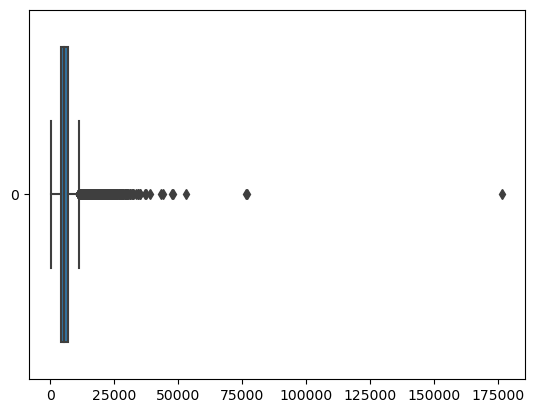

In [24]:
import seaborn as sns
sns.boxplot(df_4['price_per_sqft'], orient='h')

In [25]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12428 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12428 non-null  object 
 1   total_sqft      12386 non-null  float64
 2   bath            12428 non-null  float64
 3   balcony         12428 non-null  float64
 4   price           12428 non-null  float64
 5   bhk             12428 non-null  int64  
 6   price_per_sqft  12386 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.0+ MB


In [26]:
series = df_4['price_per_sqft']
q1 = series.quantile(.25)
q3 = series.quantile(.75)
iqr = q3 - q1
lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr
print(lb,ub)

36.91874999999891 11176.728750000002


In [27]:
df_4.shape

(12428, 7)

In [28]:
df_4 = df_4[(df_4['price_per_sqft'] >= lb) & (df_4['price_per_sqft'] <= ub)]
df_4.shape

(11330, 7)

In [29]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11330 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        11330 non-null  object 
 1   total_sqft      11330 non-null  float64
 2   bath            11330 non-null  float64
 3   balcony         11330 non-null  float64
 4   price           11330 non-null  float64
 5   bhk             11330 non-null  int64  
 6   price_per_sqft  11330 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 708.1+ KB


<Axes: >

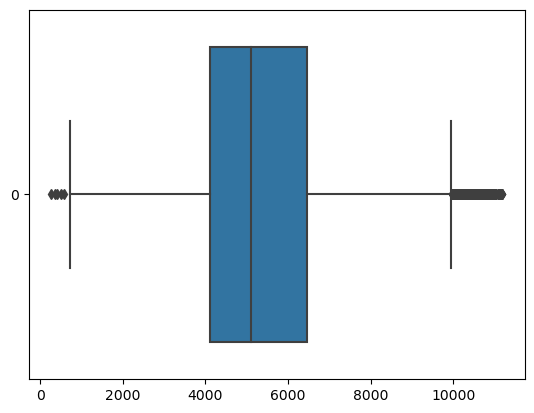

In [30]:
sns.boxplot(df_4['price_per_sqft'], orient='h')

In [31]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11330 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        11330 non-null  object 
 1   total_sqft      11330 non-null  float64
 2   bath            11330 non-null  float64
 3   balcony         11330 non-null  float64
 4   price           11330 non-null  float64
 5   bhk             11330 non-null  int64  
 6   price_per_sqft  11330 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 966.2+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder

LabEnc = LabelEncoder()
df_4['location'] = LabEnc.fit_transform(df_4['location'])

In [33]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11330 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        11330 non-null  int32  
 1   total_sqft      11330 non-null  float64
 2   bath            11330 non-null  float64
 3   balcony         11330 non-null  float64
 4   price           11330 non-null  float64
 5   bhk             11330 non-null  int64  
 6   price_per_sqft  11330 non-null  float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 921.9 KB


In [34]:
df_4['price'] = round(df_4['price_per_sqft'] * df_4['total_sqft'])

In [35]:
df_4.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,77,1056.0,2.0,1.0,3906999.0,2,3699.81
1,59,2600.0,5.0,3.0,11999988.0,4,4615.38
2,222,1440.0,2.0,3.0,6200006.0,3,4305.56
3,155,1521.0,3.0,1.0,9499999.0,3,6245.89
4,147,1200.0,2.0,1.0,5100000.0,2,4250.00


<Axes: >

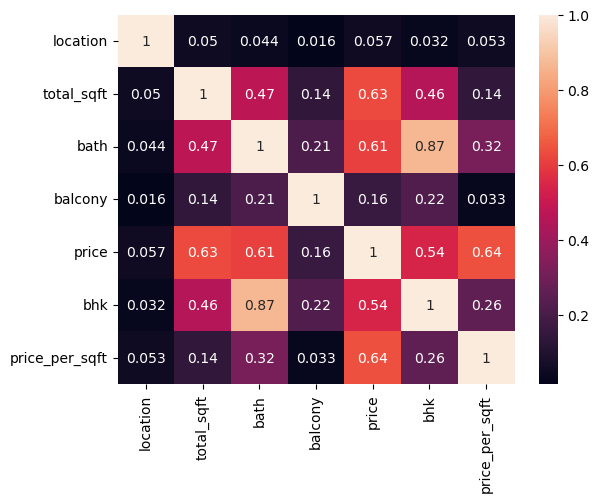

In [36]:
sns.heatmap(df_4.corr(), annot=True)

In [37]:
from sklearn.model_selection import train_test_split

X = df_4.drop(['price','price_per_sqft'], axis=1)
y = df_4['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(9064, 5)
(2266, 5)
(9064,)
(2266,)


In [38]:
y[1]

4615.38

In [39]:
from sklearn.preprocessing import StandardScaler

StdSclr = StandardScaler()
X_train = StdSclr.fit_transform(X_train)
X_test = StdSclr.transform(X_test)
#y_train = StdSclr.fit_transform(np.array(y_train).reshape(-1,1))
#y_test = StdSclr.transform(np.array(y_test).reshape(-1,1))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(9064, 5)
(2266, 5)
(9064,)
(2266,)


In [40]:
X_train[30]

array([ 0.62291898,  0.09733352, -0.45158068,  1.77680777,  0.47104369])

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

model_dict = {'Linear Regression' : {'model': LinearRegression()},
              'Lasso Regression' : {'model': Lasso(random_state=42)},
              'Ridge Regression' : {'model': Ridge(random_state=42)},
              'Elastic Net' : {'model': ElasticNet(random_state=42)},
              'Decision Tree' : {'model': DecisionTreeRegressor(random_state=42)},
              'Random Forest' : {'model': RandomForestRegressor(random_state=42)},
              'SVM Regressor' : {'model': SVR()},
              'AdaBoost' : {'model': AdaBoostRegressor(random_state=42)},
              'Gradient Boosting' : {'model': GradientBoostingRegressor(random_state=42)},
              'XGBoost' : {'model': XGBRegressor(random_state=42)}}

In [42]:
def fit_eval_model(model_name, X_train, y_train, X_test, y_test):
    model = model_dict[model_name]["model"]
    model.fit(X_train, y_train)
    y_pred_t = model.predict(X_train)
    y_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_t))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    score = model.score(X_train, y_train)
    return train_rmse, test_rmse, score

In [43]:
train_rmse = []
test_rmse = []
models = []

for model_name in model_dict.keys():
    models.append(model_name)
    train_rmse.append(fit_eval_model(model_name, X_train, y_train, X_test, y_test)[0])
    test_rmse.append(fit_eval_model(model_name, X_train, y_train, X_test, y_test)[1])
    rmse_scores = pd.DataFrame({'Models': models, 'Train RMSE': train_rmse, 'Test RMSE': test_rmse})



In [44]:
rmse_scores.sort_values(ascending=True, by='Test RMSE', ignore_index=True)

,Models,Train RMSE,Test RMSE,Score
0,XGBoost,1043.814727,1403.241759,0.660370
1,Gradient Boosting,1445.444124,1508.761536,0.348729
2,Random Forest,679.482070,1520.479045,0.856082
3,Lasso Regression,1695.012708,1733.359129,0.104418
4,Linear Regression,1695.007468,1733.451372,0.104424
5,Ridge Regression,1695.007475,1733.455309,0.104424
6,AdaBoost,1695.624480,1744.270687,0.103771
7,Elastic Net,1706.035732,1748.727267,0.092732
8,SVM Regressor,1753.678607,1780.842726,0.041351
9,Decision Tree,460.210240,1916.853817,0.933981


In [46]:
from sklearn.model_selection import cross_val_score

cv_scores = []

for model_name in model_dict.keys():
    cv_score = cross_val_score(model_dict[model_name]["model"], X, y, cv=5, scoring='r2')
    cv_scores.append(cv_score.mean())

rmse_scores['CV_score'] = cv_scores

In [47]:
rmse_scores.sort_values(ascending=True, by='Test RMSE', ignore_index=True)

,Models,Train RMSE,Test RMSE,CV_score
0,XGBoost,1043.814727,1403.241759,0.384860
1,Gradient Boosting,1445.444124,1508.761536,0.309940
2,Random Forest,679.482070,1520.479045,0.322988
3,Lasso Regression,1695.012708,1733.359129,0.098914
4,Linear Regression,1695.007468,1733.451372,0.098927
5,Ridge Regression,1695.007475,1733.455309,0.098926
6,AdaBoost,1695.624480,1744.270687,0.080079
7,Elastic Net,1706.035732,1748.727267,0.084165
8,SVM Regressor,1753.678607,1780.842726,0.032720
9,Decision Tree,460.210240,1916.853817,-0.069832


<b>Hyperparameter Tuning Top 3 Models:</b>

In [48]:
model_dict = {
    'XGBoost' : {'model': XGBRegressor(random_state=42)},
    'Gradient Boosting' : {'model': GradientBoostingRegressor(random_state=42)},
    'Random Forest' : {'model': RandomForestRegressor(random_state=42)}
    }

In [75]:
hyperparams_dict = {
    'Random Forest': {
        'n_estimators': [100, 200, 300, 400, 500],
        'criterion': ['friedman_mse', 'absolute_error', 'squared_error', 'poisson'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.01, 0.1, 0.05, 0.001],
        'max_depth': [3, 4, 5, 6],
        'subsample': [0.5, 0.7, 1.0],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.01, 0.1, 0.05, 0.001],
        'max_depth': [3, 4, 5, 6],
        'subsample': [0.5, 0.7, 1.0],
        'min_child_weight': [1, 2, 4],
        'colsample_bytree': [0.5, 0.7, 1.0],
        'gamma': [0, 0.1, 0.2, 0.5]
    }
}

In [76]:
from sklearn.model_selection import GridSearchCV

for model_name in model_dict.keys():
    model = model_dict[model_name]['model']
    param_grid = hyperparams_dict[model_name]

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    print(model, grid_search.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...) {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 1.0}
GradientBoostingRegressor(random_state=42) {'learning_rate': 0.05, 'max_depth': 6, 'max_features': None, 'min_sample

In [49]:
model_dict = {
    'XGBoost' : {'model': XGBRegressor(colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=500, subsample=1.0, random_state=42)},
    'Gradient Boosting' : {'model': GradientBoostingRegressor(learning_rate=0.05, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500, random_state=42)},
    #'Random Forest' : {'model': RandomForestRegressor(random_state=42)}
    }

In [50]:
train_rmse = []
test_rmse = []
models = []

for model_name in model_dict.keys():
    models.append(model_name)
    train_rmse.append(fit_eval_model(model_name, X_train, y_train, X_test, y_test)[0])
    test_rmse.append(fit_eval_model(model_name, X_train, y_train, X_test, y_test)[1])
    rmse_scores = pd.DataFrame({'Models': models, 'Train RMSE': train_rmse, 'Test RMSE': test_rmse})

In [51]:
rmse_scores.sort_values(ascending=True, by='Test RMSE', ignore_index=True)

,Models,Train RMSE,Test RMSE
0,XGBoost,1162.875264,1411.527395
1,Gradient Boosting,1080.388003,1422.102982
